In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.utils import resample

In [2]:
data = pd.read_csv('fraudTrain.csv')

In [3]:
data.shape

(1296675, 23)

In [4]:
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [5]:
data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [6]:
# Descriptive statistics
desc_stats = data.describe()

# Renaming index for better readability
desc_stats.index = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Function to format large numbers in a more readable way
def format_large_numbers(num):
    if abs(num) >= 1e6:
        return f'{num/1e6:.2f}M'
    elif abs(num) >= 1e3:
        return f'{num/1e3:.2f}K'
    else:
        return f'{num:.2f}'

# Apply formatting to all numeric values
formatted_stats = desc_stats.applymap(lambda x: format_large_numbers(x) if isinstance(x, (int, float)) else x)

# Transpose the DataFrame for better readability in the final display
formatted_stats = formatted_stats.T

# For a better display in Jupyter Notebook
from IPython.display import display
display(formatted_stats)


C:\Users\HP\AppData\Local\Temp\ipykernel_11760\2310628144.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_stats = desc_stats.applymap(lambda x: format_large_numbers(x) if isinstance(x, (int, float)) else x)


Count              Mean                Std        Min  \
Unnamed: 0  1.30M           648.34K            374.32K       0.00   
cc_num      1.30M  417192042079.73M  1308806447000.79M  60416.21M   
amt         1.30M             70.35             160.32       1.00   
zip         1.30M            48.80K             26.89K      1.26K   
lat         1.30M             38.54               5.08      20.03   
long        1.30M            -90.23              13.76    -165.67   
city_pop    1.30M            88.82K            301.96K      23.00   
unix_time   1.30M          1349.24M             12.84M   1325.38M   
merch_lat   1.30M             38.54               5.11      19.03   
merch_long  1.30M            -90.23              13.77    -166.67   
is_fraud    1.30M              0.01               0.08       0.00   

                      25%             50%             75%                Max  
Unnamed: 0        324.17K         648.34K         972.51K              1.30M  
cc_num      180042946.49M  3521417320.84M  4642255475.29M  4992346398065.15M  
amt                  9.65           47.52           83.14             28.95K  
zip                26.24K          48.17K          72.04K             99.78K  
lat                 34.62           39.35           41.94              66.69  
long               -96.80          -87.48          -80.16             -67.95  
city_pop           743.00           2.46K          20.33K              2.91M  
unix_time        1338.75M        1349.25M        1359.39M           1371.82M  
merch_lat           34.73           39.37           41.96              67.51  
merch_long         -96.90          -87.44          -80.24             -66.95  
is_fraud             0.00            0.00            0.00               1.00

Checking null values

In [7]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
print(data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [11]:
data['dob'] = pd.to_datetime(data['dob'])
today = pd.to_datetime('today')
data['age'] = (today - data['dob']).dt.days / 365.25

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
data['age_bin'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
data[['age','age_bin']]

age age_bin
0        36.251882   30-40
1        45.968515   40-50
2        62.387406   60-70
3        57.407255   50-60
4        38.201232   30-40
...            ...     ...
1296670  62.540726   60-70
1296671  44.495551   40-50
1296672  56.777550   50-60
1296673  43.808350   40-50
1296674  28.815880   20-30

[1296675 rows x 2 columns]

In [12]:
agg_data = data.groupby(['age_bin', 'is_fraud']).size().reset_index(name='count')

# Pivot the data to make it suitable for calculation
pivot_data = agg_data.pivot_table(index='age_bin', columns='is_fraud', values='count', fill_value=0)

# Calculate total counts and fraud percentage for each age bin
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data['fraud_percentage'] = (pivot_data[1] / pivot_data['total']) * 100

# Reset index to ensure age_bin becomes a column
pivot_data = pivot_data.reset_index()

# Verify the calculated percentages
print(pivot_data)

is_fraud age_bin         0       1     total  fraud_percentage
0           0-10       0.0     0.0       0.0               NaN
1          10-20    4935.0    34.0    4969.0          0.684242
2          20-30  118288.0   756.0  119044.0          0.635059
3          30-40  294430.0  1420.0  295850.0          0.479973
4          40-50  269361.0  1170.0  270531.0          0.432483
5          50-60  251331.0  1447.0  252778.0          0.572439
6          60-70  166388.0  1275.0  167663.0          0.760454
7          70-80   93625.0   566.0   94191.0          0.600907
8          80-90   54592.0   518.0   55110.0          0.939938
9         90-100   36219.0   320.0   36539.0          0.875777


C:\Users\HP\AppData\Local\Temp\ipykernel_11760\1069575359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = data.groupby(['age_bin', 'is_fraud']).size().reset_index(name='count')


# EDA

## Transaction Categories

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


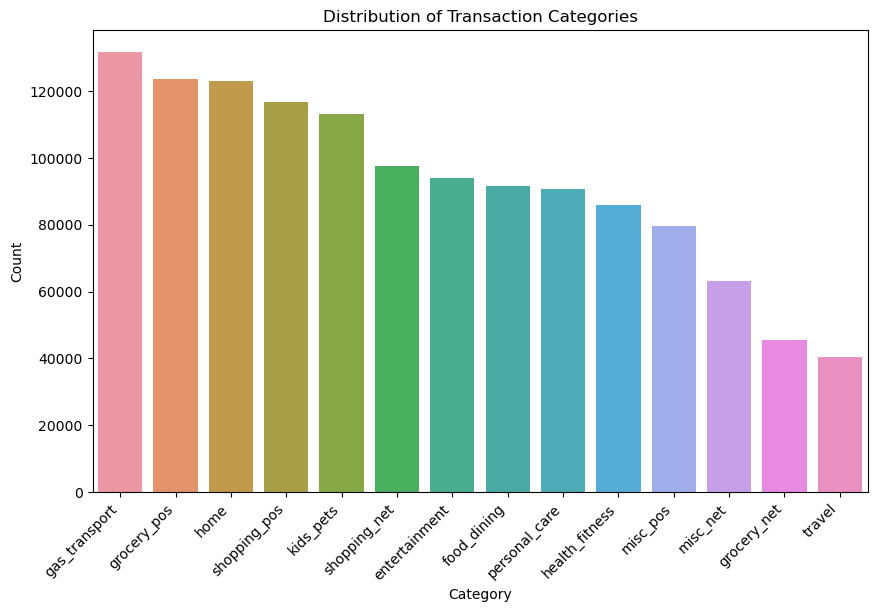

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Percentage of Fradulent transactions by Gender

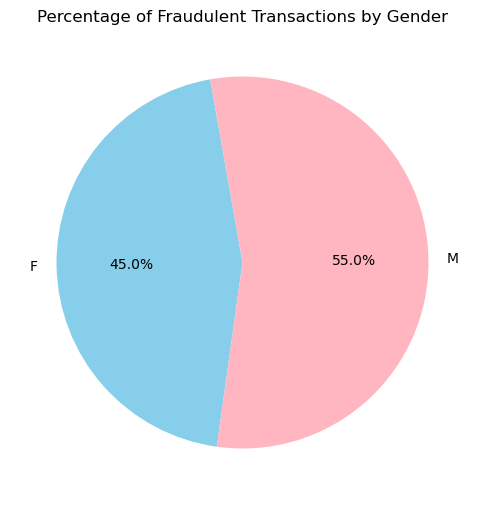

In [14]:
agg_data_gender = data.groupby(['gender', 'is_fraud']).size().reset_index(name='count')
total_fraud = agg_data_gender[agg_data_gender['is_fraud'] == 1].groupby('gender')['count'].sum()
total_transactions = data['gender'].value_counts()
fraud_percentage = (total_fraud / total_transactions) * 100

# Create pie chart
plt.figure(figsize=(6, 8))
fraud_percentage.plot.pie(autopct='%1.1f%%', startangle=100, colors=['skyblue', 'lightpink'])

plt.title('Percentage of Fraudulent Transactions by Gender')
plt.ylabel('')
plt.show()

## Percentage of fradulent transaction by Age

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


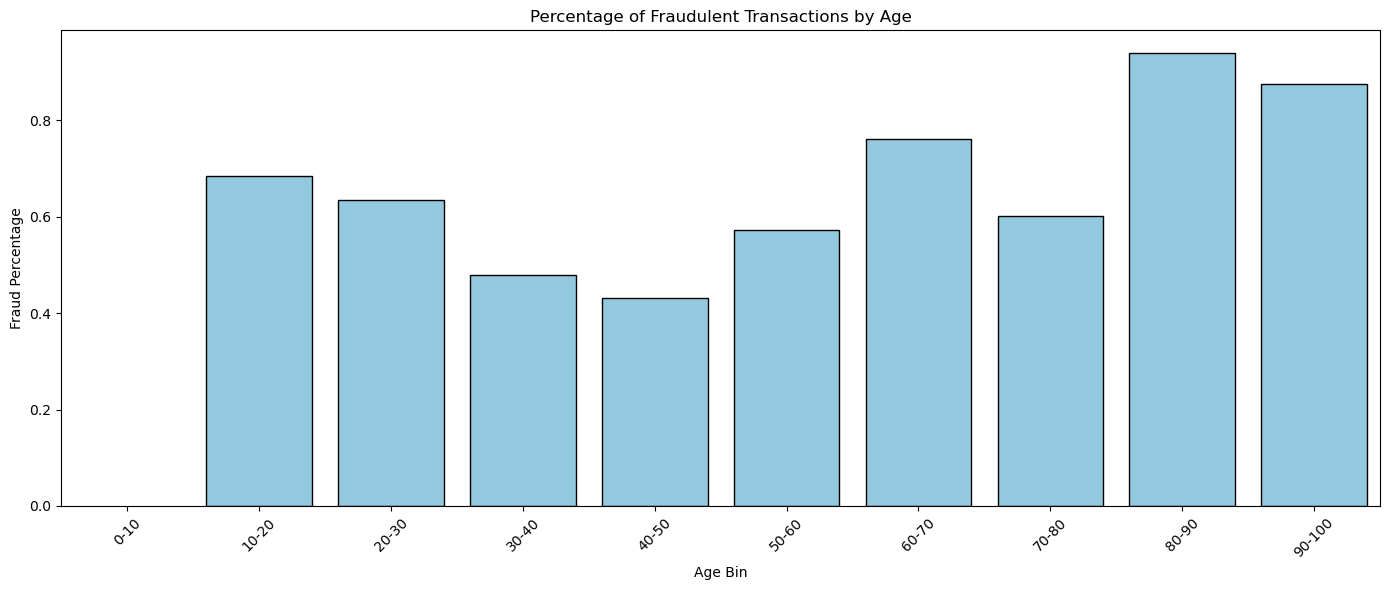

In [15]:
# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='age_bin', y='fraud_percentage', data=pivot_data, color='skyblue', edgecolor='black')

plt.title('Percentage of Fraudulent Transactions by Age')
plt.xlabel('Age Bin')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Percentage of Fradulent Transactions by Category

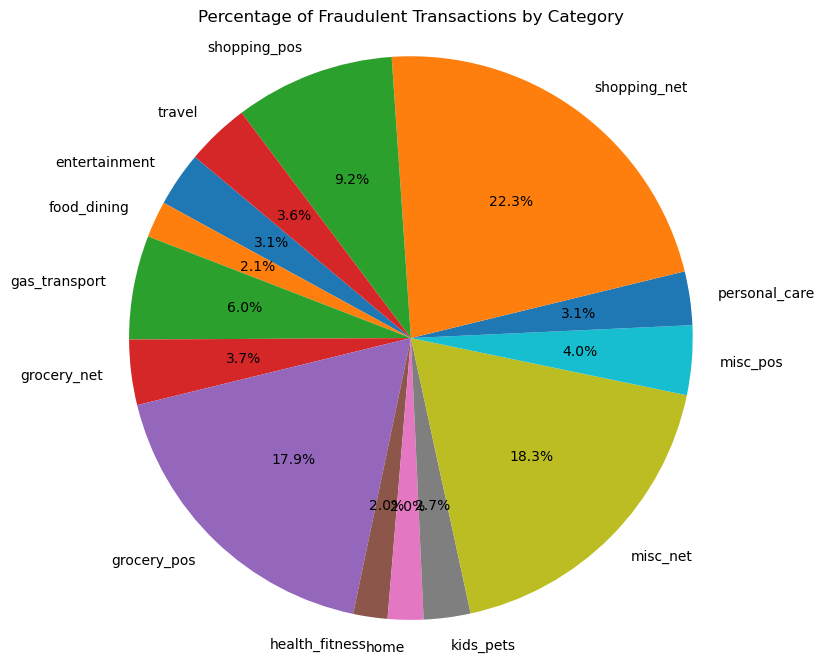

In [16]:
# Group the DataFrame by the category column and calculate the total number of transactions and fraudulent transactions for each category
transactions_by_category = data.groupby('category').size().reset_index(name='total_transactions')
fraudulent_transactions_by_category = data[data['is_fraud'] == 1].groupby('category').size().reset_index(name='fraudulent_transactions')

# Merge the two DataFrames on category
fraud_percentage_by_category = pd.merge(transactions_by_category, fraudulent_transactions_by_category, on='category', how='left')

# Calculate the percentage of fraudulent transactions for each category
fraud_percentage_by_category['fraud_percentage'] = (fraud_percentage_by_category['fraudulent_transactions'] / fraud_percentage_by_category['total_transactions']) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_percentage_by_category['fraud_percentage'], labels=fraud_percentage_by_category['category'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Fraudulent Transactions by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Percentage of Fradulent Transactions by Day

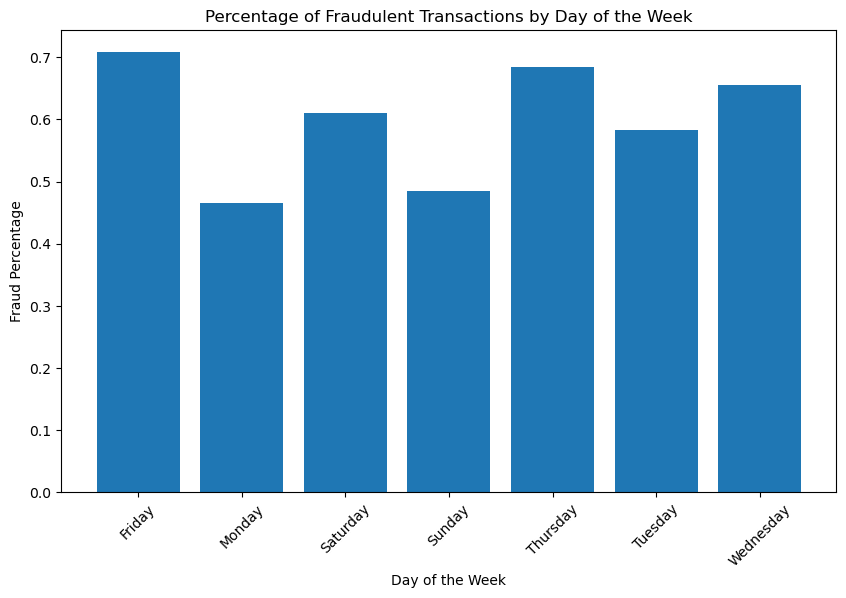

In [17]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
transactions_by_day = data.groupby('day_of_week').size().reset_index(name='total_transactions')
fraudulent_transactions_by_day = data[data['is_fraud'] == 1].groupby('day_of_week').size().reset_index(name='fraudulent_transactions')
fraud_percentage_by_day = pd.merge(transactions_by_day, fraudulent_transactions_by_day, on='day_of_week', how='left')
fraud_percentage_by_day['fraud_percentage'] = (fraud_percentage_by_day['fraudulent_transactions'] / fraud_percentage_by_day['total_transactions']) * 100
plt.figure(figsize=(10, 6))
plt.bar(fraud_percentage_by_day['day_of_week'], fraud_percentage_by_day['fraud_percentage'])
plt.title('Percentage of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)

plt.show()

In [18]:
import folium
from folium.plugins import MarkerCluster

map_center = [data['lat'].mean(), data['long'].mean()]
fraud_map = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(fraud_map)

# Add markers for each fraudulent transaction
for index, row in data.iterrows():
    if row['is_fraud'] == 1:
        folium.Marker([row['lat'], row['long']], popup='Fraudulent Transaction').add_to(marker_cluster)

# Calculate the count of fraudulent transactions
fraudulent_transactions_count = data[data['is_fraud'] == 1].shape[0]

# Add the count of fraudulent transactions to the map
folium.Marker([map_center[0], map_center[1]], popup='Fraudulent Transactions Count: {}'.format(fraudulent_transactions_count), icon=folium.Icon(color='red')).add_to(fraud_map)

# Save the map to an HTML file
fraud_map.save("fraud_map_with_count.html")

# Display the map
fraud_map

In [19]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [20]:
# Extract date and time components into separate columns
data['trans_date'] = data['trans_date_trans_time'].dt.date
data['trans_time'] = data['trans_date_trans_time'].dt.time

# Drop the original 'trans_date_trans_time' column
data.drop('trans_date_trans_time', axis=1, inplace=True)

In [21]:
data.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'age_bin', 'day_of_week', 'trans_date',
       'trans_time'],
      dtype='object')

In [22]:
data.dtypes

Unnamed: 0              int64
cc_num                  int64
merchant               object
category               object
amt                   float64
first                  object
last                   object
gender                 object
street                 object
city                   object
state                  object
zip                     int64
lat                   float64
long                  float64
city_pop                int64
job                    object
dob            datetime64[ns]
trans_num              object
unix_time               int64
merch_lat             float64
merch_long            float64
is_fraud                int64
age                   float64
age_bin              category
day_of_week            object
trans_date             object
trans_time             object
dtype: object

In [23]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0','cc_num','first', 'last',  'street', 'city', 'unix_time', 'zip', 'city_pop', 'merch_lat', 'merch_long','lat', 'long','trans_num', 'day_of_week', 'age', 'age_bin']

# Drop the specified columns
data.drop(columns_to_drop, axis=1, inplace=True)

In [24]:
print(data.columns)

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'dob',
       'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')


In [25]:
len(data['merchant'].unique())

693

In [26]:
len(data['category'].unique())

14

In [27]:
len(data['gender'].unique())

2

In [28]:
len(data['job'].unique())

494

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['merchant'] = label_encoder.fit_transform(data['merchant'])
data['job']=label_encoder.fit_transform(data['job'])

In [30]:
columns_to_encode = ['gender', 'category', 'state']
encoded_df = pd.get_dummies(data, columns=columns_to_encode)
encoded_df.head()

merchant     amt  job        dob  is_fraud  trans_date trans_time  \
0       514    4.97  370 1988-03-09         0  2019-01-01   00:00:18   
1       241  107.23  428 1978-06-21         0  2019-01-01   00:00:44   
2       390  220.11  307 1962-01-19         0  2019-01-01   00:00:51   
3       360   45.00  328 1967-01-12         0  2019-01-01   00:01:16   
4       297   41.96  116 1986-03-28         0  2019-01-01   00:03:06   

   gender_F  gender_M  category_entertainment  ...  state_SD  state_TN  \
0      True     False                   False  ...     False     False   
1      True     False                   False  ...     False     False   
2     False      True                    True  ...     False     False   
3     False      True                   False  ...     False     False   
4     False      True                   False  ...     False     False   

   state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0     False     False     False     False     False     False     False   
1     False     False     False     False      True     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False      True     False     False     False     False   

   state_WY  
0     False  
1     False  
2     False  
3     False  
4     False  

[5 rows x 74 columns]

In [31]:
encoded_df.shape

(1296675, 74)

In [32]:
# Convert 'dob' to datetime format if it's not already
encoded_df['dob'] = pd.to_datetime(encoded_df['dob'])

# Extract the birth year
encoded_df['birth_year'] = encoded_df['dob'].dt.year

# Drop the 'dob' column
encoded_df.drop('dob', axis=1, inplace=True)

In [33]:
encoded_df.head()

merchant     amt  job  is_fraud  trans_date trans_time  gender_F  gender_M  \
0       514    4.97  370         0  2019-01-01   00:00:18      True     False   
1       241  107.23  428         0  2019-01-01   00:00:44      True     False   
2       390  220.11  307         0  2019-01-01   00:00:51     False      True   
3       360   45.00  328         0  2019-01-01   00:01:16     False      True   
4       297   41.96  116         0  2019-01-01   00:03:06     False      True   

   category_entertainment  category_food_dining  ...  state_TN  state_TX  \
0                   False                 False  ...     False     False   
1                   False                 False  ...     False     False   
2                    True                 False  ...     False     False   
3                   False                 False  ...     False     False   
4                   False                 False  ...     False     False   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  \
0     False     False     False     False     False     False     False   
1     False     False     False      True     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False      True     False     False     False     False     False   

   birth_year  
0        1988  
1        1978  
2        1962  
3        1967  
4        1986  

[5 rows x 74 columns]

In [34]:
encoded_df['trans_date_unix'] = pd.to_datetime(encoded_df['trans_date']).apply(lambda x: int(x.timestamp()))
encoded_df.drop('trans_date', axis=1, inplace=True)

In [35]:
encoded_df['trans_time_seconds'] = pd.to_datetime(encoded_df['trans_time'], format='%H:%M:%S').dt.hour * 3600 + \
                           pd.to_datetime(encoded_df['trans_time'], format='%H:%M:%S').dt.minute * 60 + \
                           pd.to_datetime(encoded_df['trans_time'], format='%H:%M:%S').dt.second

# Drop the original 'trans_time' column if not needed anymore
encoded_df.drop('trans_time', axis=1, inplace=True)

# Analyzing the ratio of fraud and not - fraud columns

In [36]:
fraud_counts = data['is_fraud'].value_counts()
# Print the number of rows with 0 and 1 in the 'is_fraud' column
print("Number of rows with 0 (non-fraud):", fraud_counts[0])
print("Number of rows with 1 (fraud):", fraud_counts[1])

Number of rows with 0 (non-fraud): 1289169
Number of rows with 1 (fraud): 7506


In [37]:
(fraud_counts[1]/fraud_counts[0])*100

0.5822355331224999

# Upsampling

In [38]:
X = encoded_df.drop(columns=['is_fraud'])
y = encoded_df['is_fraud']

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)

In [41]:
# model = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', solver='saga', C=0.01)

In [42]:
# model.fit(X_train, y_train)

In [43]:
# y_pred = model.predict(X_test)

In [44]:
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [45]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9247888176113314
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    257186
           1       0.96      0.88      0.92    258482

    accuracy                           0.92    515668
   macro avg       0.93      0.92      0.92    515668
weighted avg       0.93      0.92      0.92    515668



In [46]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9985164873523275
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668



In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')  # Adding class weights for handling imbalance
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9980374969941901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668

AUC-ROC: 0.9980356910410902


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("AUC-ROC:", roc_auc_score(y_test, y_pred))

In [ ]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Assuming X_resampled_df and y_resampled_df are already defined
# X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Perform PCA for dimensionality reduction
# pca = PCA(n_components=0.95)  # Keep 95% of variance
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# # Define the SVC model with a linear kernel
# model = SVC(kernel='linear', random_state=42)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train_pca, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the final model with the best parameters
# final_model = grid_search.best_estimator_
# final_model.fit(X_train_pca, y_train)

# # Predict on the test set
# y_pred = final_model.predict(X_test_pca)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# # Define the base model
# base_model = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', solver='saga')

# # Wrap the base model with BaggingClassifier
# bagging_model = BaggingClassifier(base_model, random_state=42, n_jobs=-1)

# # Set up the hyperparameter grid
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_samples': [0.5, 0.7, 1.0],
#     'max_features': [0.5, 0.7, 1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the final model with the best parameters
# final_model = grid_search.best_estimator_
# final_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = final_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))